## Import Libraries

In [1]:
import geoutils
from pathlib import Path
import pandas as pd
import numpy as np
import gdal
import matplotlib as mpl
import rasterio
import geopandas as gpd
print('import complete')

import complete


## Configure Paths

In [2]:
data_path = Path('/home/ahm/Datascience/Satellite Imagery Detection/getting_started_with_spacenet/processedBuildingLabels/data')

## Plotting Settings

In [3]:
%matplotlib inline

In [4]:
dpi = 300
mpl.rcParams['figure.dpi']= dpi

## Loading Data to DataFrame

In [12]:
# df = geoutils.get_dataframe_from_data(data_path=data_path)

In [14]:
# df.head()

In [15]:
# df['geoshape'] = df['geojson'].map(lambda x: geoutils.get_geojson_shape(x))

In [18]:
# df.to_pickle('df')

In [19]:
df = pd.read_pickle('df')

In [20]:
df.head()

,3band,8band,geojson,image_number,geoshape
0,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,1,"(0, 1)"
1,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,2,"(0, 1)"
2,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,3,"(0, 1)"
3,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,4,"(0, 1)"
4,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,5,"(0, 1)"


In [34]:
df_geo = df[df['geoshape']!=(0,1)].reset_index(drop=True)

In [35]:
df_geo.head()

,3band,8band,geojson,image_number,geoshape
0,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,12,"(5, 19)"
1,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,30,"(2, 19)"
2,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,44,"(1, 19)"
3,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,46,"(11, 19)"
4,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,47,"(15, 19)"


### Percentages of images with non-empty geojson files

In [33]:
df_geo.shape[0]/df.shape[0]*100

62.10374639769453

### Reading & Plotting GeoJSON File

In [36]:
g = gpd.read_file(df_geo['geojson'][0])

In [40]:
g.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

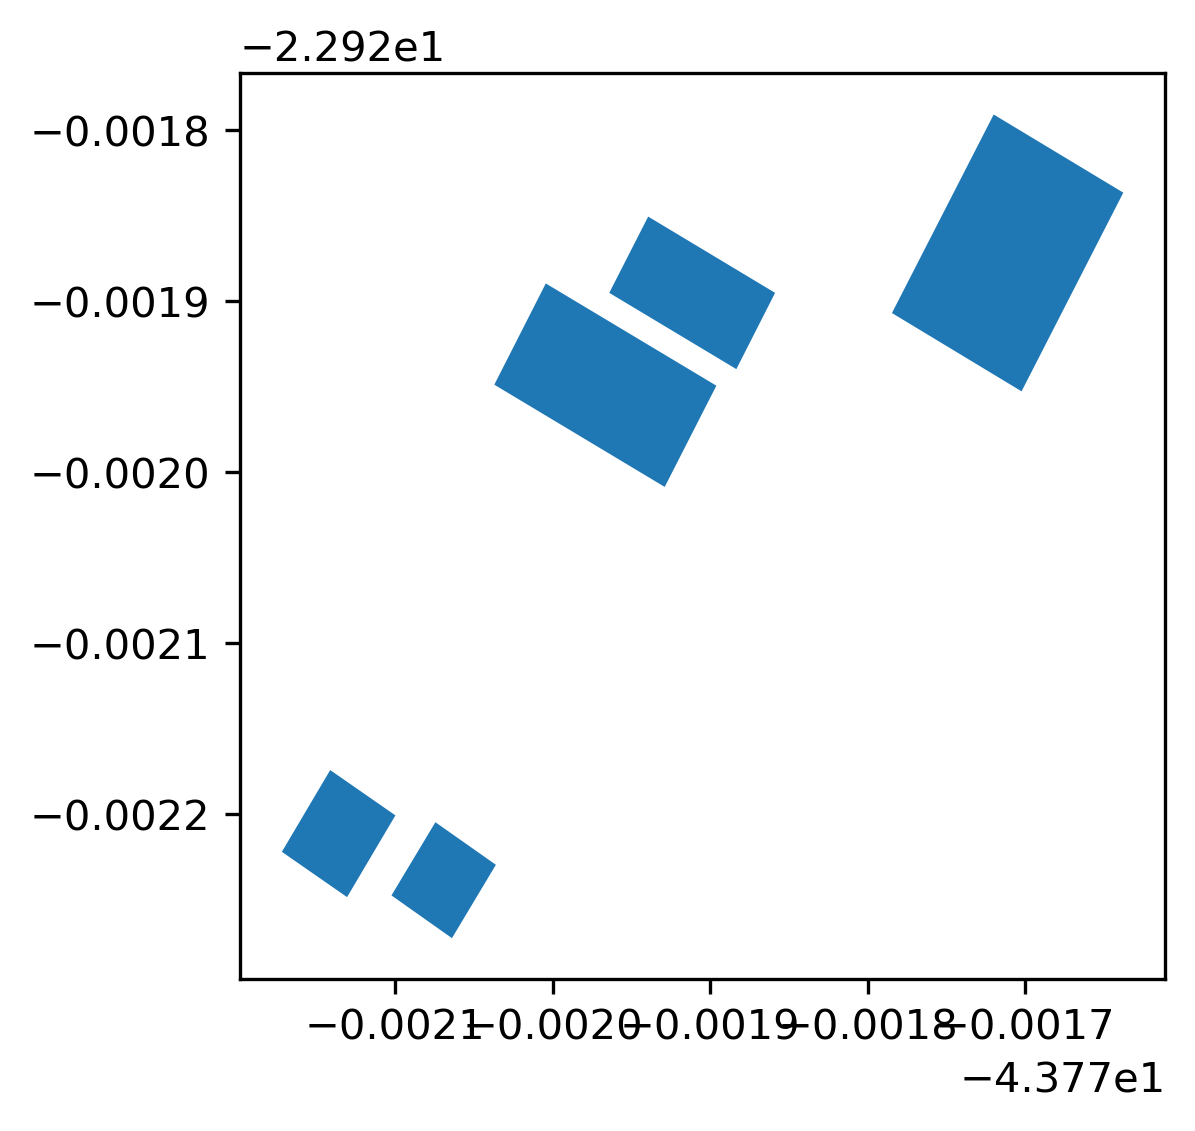

In [42]:
g.plot();